In [41]:
import numpy as np
import sqlite3
import plotly.express as px
import pandas as pd
import sqlite3
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
import statsmodels
import statsmodels.api as sm
from statsmodels.multivariate.manova import MANOVA
from useful_functions import *
from pdf2image import convert_from_path
from sklearn.manifold import TSNE

In [42]:
tables_to_join = ["tPlantMicrobeGenera", "tSample", "tPlantDNA"]
common_column = "sample_id"
full_df = import_all_data(tables_to_join, common_column)
full_df.shape

(277695, 15)

In [43]:
full_df = full_df.T.drop_duplicates().T

In [44]:
full_df.head()

,sample_id,genera,relative_abundance,site_id,collect_date,V1,V2,species,PC1,PC2,PC3,PC4,PC5
0,RRL1,Archaea|Euryarchaeota|Halobacteria|Halobacteri...,0.0,RRL,6/25/2021,0.753244,0.246756,exaltata,0.194769,0.048276,-0.02388,-0.017138,-0.039842
1,RRL2,Archaea|Euryarchaeota|Halobacteria|Halobacteri...,0.01333,RRL,6/25/2021,0.708412,0.291588,exaltata,0.154924,0.071277,0.000923,-0.02583,0.005592
2,RRL3,Archaea|Euryarchaeota|Halobacteria|Halobacteri...,0.0,RRL,6/25/2021,0.778046,0.221954,exaltata,0.18775,0.035009,-0.016006,-0.012529,-0.011169
3,RRL4,Archaea|Euryarchaeota|Halobacteria|Halobacteri...,0.00943,RRL,6/25/2021,0.720367,0.279633,exaltata,0.167167,0.046053,-0.032754,-0.016192,-0.028988
4,RRL5,Archaea|Euryarchaeota|Halobacteria|Halobacteri...,0.00581,RRL,6/25/2021,0.572487,0.427513,exaltata,0.099801,0.0898,0.000613,-0.004979,0.017524


In [45]:
df = full_df.copy()

In [46]:
subdf = df.copy()

In [47]:
origin_pivoted_df = subdf.pivot(index=['sample_id', 'site_id', 'species', 'V2'], columns='genera', values='relative_abundance')
origin_pivoted_df.shape

row_sum = origin_pivoted_df.sum(axis=1)

origin_pivoted_df = origin_pivoted_df.reset_index()

genera_col = origin_pivoted_df.columns
genera_col = genera_col.drop(['sample_id','site_id', 'species', 'V2'])

sub_pivot = origin_pivoted_df[genera_col].astype(float)

for row in range(sub_pivot.shape[0]):
    sub_pivot.loc[row] = sub_pivot.loc[row]/row_sum[row]

new_sum = sub_pivot.sum(axis=1)
new_sum

origin_pivoted_df[genera_col] = sub_pivot

origin_pivoted_df.head()

row_sum = origin_pivoted_df[genera_col].sum(axis=1)
print(row_sum)

0      1.0
1      1.0
2      1.0
3      1.0
4      1.0
      ... 
160    1.0
161    1.0
162    1.0
163    1.0
164    1.0
Length: 165, dtype: float64


In [48]:
sum_row = origin_pivoted_df[genera_col].sum()

abundant_genera = sum_row.nlargest(500)

select_columns = (abundant_genera.index).tolist()
select_columns.insert(0, 'V2')
select_columns.insert(0, 'sample_id')
select_columns.insert(0, 'site_id')
select_columns.insert(0, 'species')

origin_pivoted_df = origin_pivoted_df[select_columns]

origin_pivoted_df.head()

genera,species,site_id,sample_id,V2,Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Synechococcus,Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Thermosynechococcus,Bacteria|Cyanobacteria||Synechococcales|Prochloraceae|Prochlorococcus,Bacteria|Cyanobacteria||Gloeoemargaritales|Gloeomargaritaceae|Gloeomargarita,Eukaryota||Chlorarachniophyceae|||Lotharella,Bacteria|Proteobacteria|Gammaproteobacteria|Pseudomonadales|Pseudomonadaceae|Pseudomonas,...,Bacteria|Proteobacteria|Gammaproteobacteria|Cellvibrionales|Microbulbiferaceae|Microbulbifer,Bacteria|Proteobacteria|Alphaproteobacteria|Sphingomonadales|Sphingomonadaceae|Citromicrobium,Eukaryota|Cryptomycota||||Paramicrosporidium,Bacteria|Proteobacteria|Alphaproteobacteria|Rhizobiales|Hyphomicrobiaceae|Pelagibacterium,Bacteria|Proteobacteria|Alphaproteobacteria|Rhodospirillales|Rhodospirillaceae|Rhodovibrio,Bacteria|Proteobacteria|Gammaproteobacteria|Enterobacterales|Enterobacteriaceae|Lelliottia,Bacteria|Proteobacteria|Betaproteobacteria|Neisseriales|Chromobacteriaceae|Jeongeupia,Bacteria|Actinobacteria|Actinobacteria|Catenulisporales|Catenulisporaceae|Catenulispora,Bacteria|Proteobacteria|Deltaproteobacteria|Myxococcales|Anaeromyxobacteraceae|Anaeromyxobacter,Bacteria|Proteobacteria|Gammaproteobacteria|Chromatiales|Ectothiorhodospiraceae|Thioalkalivibrio
0,syriaca,CMB,CMB10,0.999777,0.251082,0.109277,0.040132,0.037915,0.032095,0.022154,...,0.000000,0.000023,0.000003,0.000463,0.0,0.00000,0.000000,0.0,0.000000,0.000021
1,syriaca,CMB,CMB11,1.000000,0.229215,0.108392,0.047850,0.043322,0.032733,0.033949,...,0.000000,0.000053,0.000095,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000
2,syriaca,CMB,CMB13,0.989131,0.248940,0.130199,0.066974,0.037310,0.042894,0.035666,...,0.000000,0.000000,0.000008,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000
3,syriaca,CMB,CMB14,0.999992,0.207900,0.115806,0.037190,0.045575,0.039696,0.022566,...,0.000000,0.000000,0.000000,0.000000,0.0,0.00000,0.000000,0.0,0.000000,0.000000
4,syriaca,CMB,CMB15,0.998548,0.115334,0.067272,0.002857,0.033787,0.023724,0.208106,...,0.000172,0.000079,0.000000,0.000000,0.0,0.00006,0.000246,0.0,0.000144,0.000971


In [49]:
opdf = origin_pivoted_df.copy()
microbe_cols = abundant_genera.index

In [50]:
opdf[microbe_cols] = StandardScaler().fit_transform(opdf[microbe_cols])  

In [51]:
opdf.head()

genera,species,site_id,sample_id,V2,Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Synechococcus,Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Thermosynechococcus,Bacteria|Cyanobacteria||Synechococcales|Prochloraceae|Prochlorococcus,Bacteria|Cyanobacteria||Gloeoemargaritales|Gloeomargaritaceae|Gloeomargarita,Eukaryota||Chlorarachniophyceae|||Lotharella,Bacteria|Proteobacteria|Gammaproteobacteria|Pseudomonadales|Pseudomonadaceae|Pseudomonas,...,Bacteria|Proteobacteria|Gammaproteobacteria|Cellvibrionales|Microbulbiferaceae|Microbulbifer,Bacteria|Proteobacteria|Alphaproteobacteria|Sphingomonadales|Sphingomonadaceae|Citromicrobium,Eukaryota|Cryptomycota||||Paramicrosporidium,Bacteria|Proteobacteria|Alphaproteobacteria|Rhizobiales|Hyphomicrobiaceae|Pelagibacterium,Bacteria|Proteobacteria|Alphaproteobacteria|Rhodospirillales|Rhodospirillaceae|Rhodovibrio,Bacteria|Proteobacteria|Gammaproteobacteria|Enterobacterales|Enterobacteriaceae|Lelliottia,Bacteria|Proteobacteria|Betaproteobacteria|Neisseriales|Chromobacteriaceae|Jeongeupia,Bacteria|Actinobacteria|Actinobacteria|Catenulisporales|Catenulisporaceae|Catenulispora,Bacteria|Proteobacteria|Deltaproteobacteria|Myxococcales|Anaeromyxobacteraceae|Anaeromyxobacter,Bacteria|Proteobacteria|Gammaproteobacteria|Chromatiales|Ectothiorhodospiraceae|Thioalkalivibrio
0,syriaca,CMB,CMB10,0.999777,1.658585,0.449190,-0.625305,0.059558,-0.639892,-0.180795,...,-0.137485,-0.053608,-0.556045,3.567996,-0.220287,-0.277120,-0.231399,-0.236345,-0.176828,-0.028724
1,syriaca,CMB,CMB11,1.000000,1.177418,0.398179,-0.265843,0.624099,-0.554101,0.179081,...,-0.137485,0.470029,1.649963,-0.209719,-0.220287,-0.277120,-0.231399,-0.236345,-0.176828,-0.217899
2,syriaca,CMB,CMB13,0.989131,1.611450,1.654841,0.624824,-0.003629,0.812189,0.231470,...,-0.137485,-0.451136,-0.445865,-0.209719,-0.220287,-0.277120,-0.231399,-0.236345,-0.176828,-0.217899
3,syriaca,CMB,CMB14,0.999992,0.708383,0.825395,-0.762340,0.859331,0.382159,-0.168207,...,-0.137485,-0.451136,-0.629034,-0.209719,-0.220287,-0.277120,-0.231399,-0.236345,-0.176828,-0.217899
4,syriaca,CMB,CMB15,0.998548,-1.328517,-1.971450,-2.361323,-0.371434,-1.765472,5.492609,...,0.759616,0.907725,-0.629034,-0.209719,-0.220287,0.371796,2.008069,-0.236345,0.855504,8.430593


In [52]:
opdf = opdf[opdf["species"].isin(['syriaca','exaltata'])]
opdf.shape

(154, 504)

In [53]:
df = opdf

In [54]:
site_list = df['site_id']

df['BGR'] = site_list

df['BGR'].replace({'CMB': 1, 'FRW': 1, 'LFS': 1, 'LM': 0, 'MMP': 1, 'MKP': 2,
                    'PNR': 2, 'PTW': 0, 'RF': 2, 'RGT': 0, 'RRL': 0, 'SGC': 0, 'SLG': 1,'HR': 3}, inplace=True) #
df = df[df["BGR"].isin([0,1,2,3])]

df['BGR'] = df['BGR'].replace([0], 'Wintergreen')
df['BGR'] = df['BGR'].replace([1], 'Cole Mountain')
df['BGR'] = df['BGR'].replace([2], 'Blacksburg')
df['BGR'] = df['BGR'].replace([3], 'HR')

C:\Users\15404\AppData\Local\Temp\ipykernel_22596\4253454275.py:3: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['BGR'] = site_list


In [55]:
df.head()

genera,species,site_id,sample_id,V2,Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Synechococcus,Bacteria|Cyanobacteria||Synechococcales|Synechococcaceae|Thermosynechococcus,Bacteria|Cyanobacteria||Synechococcales|Prochloraceae|Prochlorococcus,Bacteria|Cyanobacteria||Gloeoemargaritales|Gloeomargaritaceae|Gloeomargarita,Eukaryota||Chlorarachniophyceae|||Lotharella,Bacteria|Proteobacteria|Gammaproteobacteria|Pseudomonadales|Pseudomonadaceae|Pseudomonas,...,Bacteria|Proteobacteria|Alphaproteobacteria|Sphingomonadales|Sphingomonadaceae|Citromicrobium,Eukaryota|Cryptomycota||||Paramicrosporidium,Bacteria|Proteobacteria|Alphaproteobacteria|Rhizobiales|Hyphomicrobiaceae|Pelagibacterium,Bacteria|Proteobacteria|Alphaproteobacteria|Rhodospirillales|Rhodospirillaceae|Rhodovibrio,Bacteria|Proteobacteria|Gammaproteobacteria|Enterobacterales|Enterobacteriaceae|Lelliottia,Bacteria|Proteobacteria|Betaproteobacteria|Neisseriales|Chromobacteriaceae|Jeongeupia,Bacteria|Actinobacteria|Actinobacteria|Catenulisporales|Catenulisporaceae|Catenulispora,Bacteria|Proteobacteria|Deltaproteobacteria|Myxococcales|Anaeromyxobacteraceae|Anaeromyxobacter,Bacteria|Proteobacteria|Gammaproteobacteria|Chromatiales|Ectothiorhodospiraceae|Thioalkalivibrio,BGR
0,syriaca,CMB,CMB10,0.999777,1.658585,0.449190,-0.625305,0.059558,-0.639892,-0.180795,...,-0.053608,-0.556045,3.567996,-0.220287,-0.277120,-0.231399,-0.236345,-0.176828,-0.028724,Cole Mountain
1,syriaca,CMB,CMB11,1.000000,1.177418,0.398179,-0.265843,0.624099,-0.554101,0.179081,...,0.470029,1.649963,-0.209719,-0.220287,-0.277120,-0.231399,-0.236345,-0.176828,-0.217899,Cole Mountain
2,syriaca,CMB,CMB13,0.989131,1.611450,1.654841,0.624824,-0.003629,0.812189,0.231470,...,-0.451136,-0.445865,-0.209719,-0.220287,-0.277120,-0.231399,-0.236345,-0.176828,-0.217899,Cole Mountain
3,syriaca,CMB,CMB14,0.999992,0.708383,0.825395,-0.762340,0.859331,0.382159,-0.168207,...,-0.451136,-0.629034,-0.209719,-0.220287,-0.277120,-0.231399,-0.236345,-0.176828,-0.217899,Cole Mountain
4,syriaca,CMB,CMB15,0.998548,-1.328517,-1.971450,-2.361323,-0.371434,-1.765472,5.492609,...,0.907725,-0.629034,-0.209719,-0.220287,0.371796,2.008069,-0.236345,0.855504,8.430593,Cole Mountain


In [56]:
site_list = ['RRL', 'FRW', 'MMP', 'PNR', 'CMB', 'SLG', 'RF', 'LFS', 'PTW', 'LM', 'MKP', 'RGT']

# Predefined set of colors
unique_colors = ['red', 'green', 'blue', 'orange', 'purple', 'cyan', 'pink', 'brown', 'gray', 'olive', 'lime', 'teal']

# Create a dictionary with list elements as keys and corresponding colors as values
site_color_dict = dict(zip(site_list, unique_colors))

print(site_color_dict)

{'RRL': 'red', 'FRW': 'green', 'MMP': 'blue', 'PNR': 'orange', 'CMB': 'purple', 'SLG': 'cyan', 'RF': 'pink', 'LFS': 'brown', 'PTW': 'gray', 'LM': 'olive', 'MKP': 'lime', 'RGT': 'teal'}


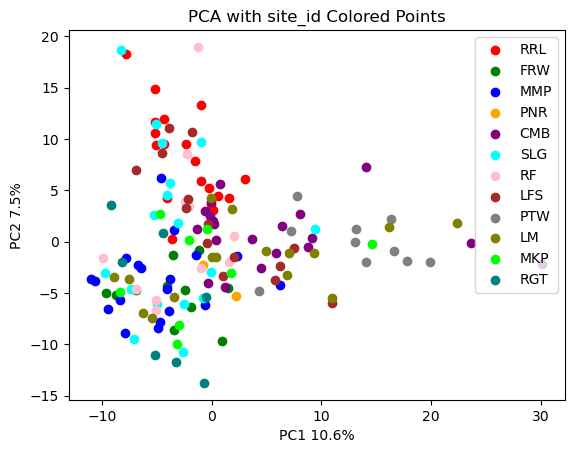

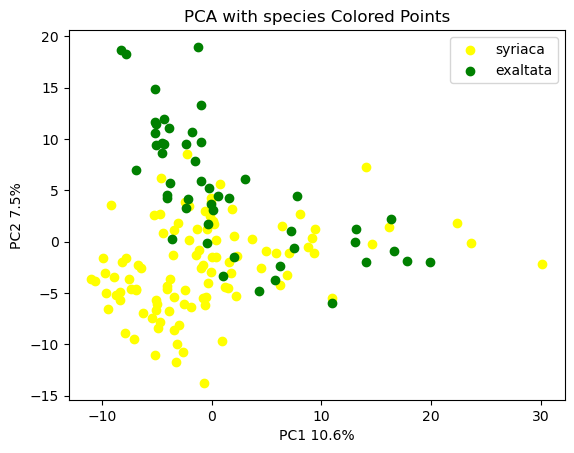

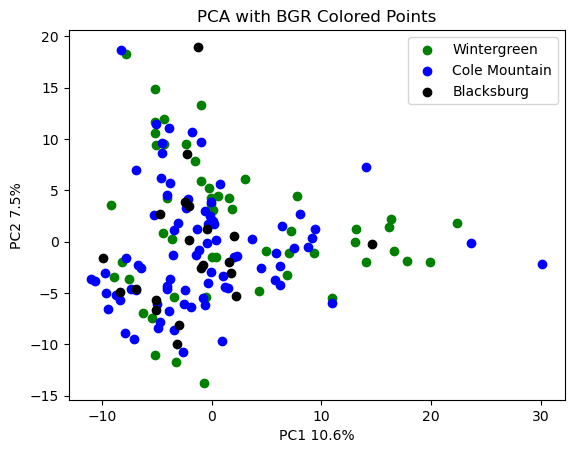

In [57]:
X = df[microbe_cols]

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X)

for graph_type in ['site_id', 'species', 'BGR']:
    if graph_type == 'site_id':
        colors = site_color_dict
    elif graph_type == 'species':
        colors = {'syriaca': 'yellow', 'exaltata': 'green'}
    else:
        colors = {'Wintergreen': 'green', 'Cole Mountain': 'blue', 'Blacksburg': 'black'}
    
    fig, ax = plt.subplots()

    for key, color in colors.items():
        mask = (df[graph_type] == key)
        ax.scatter(
            principal_components[mask, 0],
            principal_components[mask, 1],
            c=color,
            label= key
        )
    
    ax.set_xlabel("PC1 " + str(round(100*pca.explained_variance_ratio_[0], 1)) + '%')
    ax.set_ylabel("PC2 " + str(round(100*pca.explained_variance_ratio_[1], 1)) + '%')
    ax.set_title('PCA with ' + graph_type + ' Colored Points')
    ax.legend()
    plt.show()
    if graph_type == 'site_id':
        ax.set_title('PCA of Field Sites and Leaf Nutrients')
        fig1 = fig
    elif graph_type == 'species':
        ax.set_title('PCA of Plant Species and Leaf Nutrients')
        fig2 = fig
    else:
        ax.set_title('PCA of Broad Geographic Region and Leaf Nutrients')
        fig3 = fig

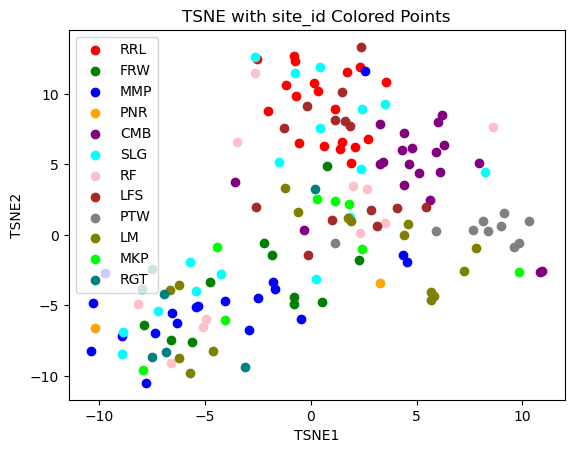

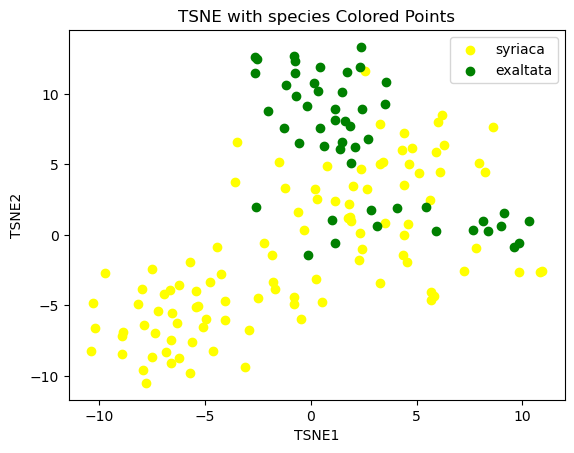

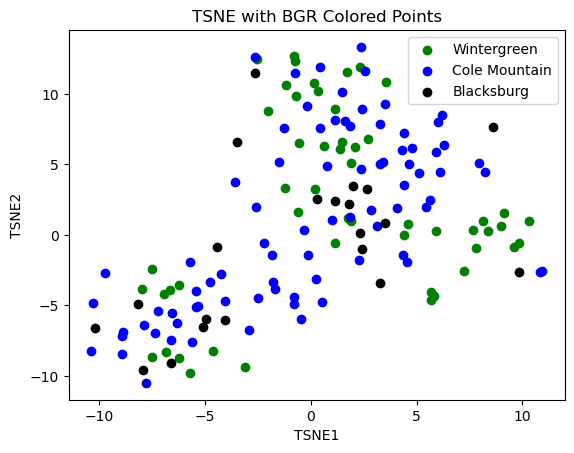

In [58]:
perplexity_value = 15 # Change this to your desired perplexity

tsne = TSNE(n_components=2, perplexity=perplexity_value, random_state=42)
tsne_transformed = tsne.fit_transform(df[microbe_cols])


for graph_type in ['site_id', 'species', 'BGR']:
    if graph_type == 'site_id':
        colors = site_color_dict
    elif graph_type == 'species':
        colors = {'syriaca': 'yellow', 'exaltata': 'green'}
    else:
        colors = {'Wintergreen': 'green', 'Cole Mountain': 'blue', 'Blacksburg': 'black'}

    fig, ax = plt.subplots()

    for key, color in colors.items():
        mask = (df[graph_type] == key)
        ax.scatter(
            tsne_transformed[mask, 0],
            tsne_transformed[mask, 1],
            c=color,
            label= key
        )
    
    ax.set_xlabel("TSNE1")
    ax.set_ylabel("TSNE2")
    ax.set_title('TSNE with ' + graph_type + ' Colored Points')
    ax.legend()
    plt.show()

    if graph_type == 'site_id':
        ax.set_title('TSNE of and Leaf Microbiome, P.V. = ' + str(perplexity_value))
        fig4 = fig
    elif graph_type == 'species':
        ax.set_title('TSNE of Species and Leaf Microbiome, P.V. = ' + str(perplexity_value))
        fig5 = fig
    else:
        ax.set_title('TSNE of Broad Geographic Region and Leaf Microbiome, P.V. = ' + str(perplexity_value))
        fig6 = fig

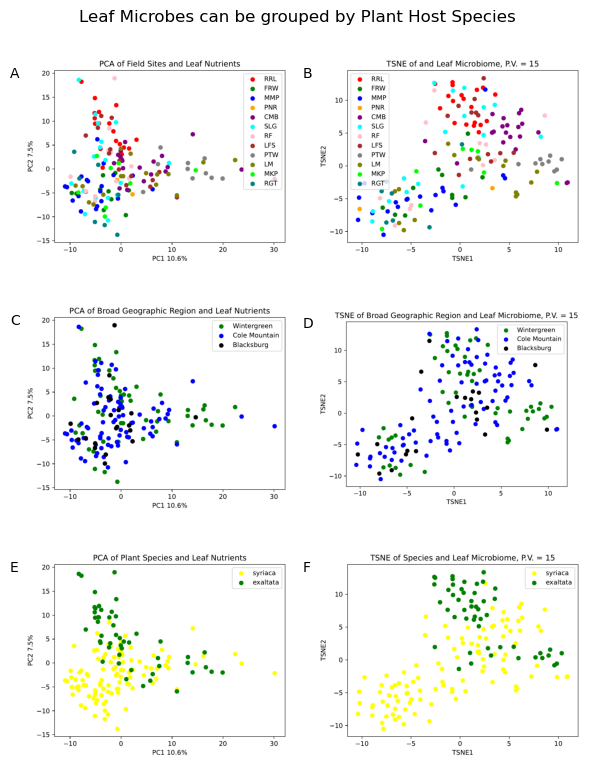

In [59]:
### Save Figures and Create Final Figure
fig1.savefig('leaf_microbe_site_id.pdf', dpi=300, bbox_inches='tight')
fig2.savefig('leaf_microbe_species.pdf', dpi=300, bbox_inches='tight')
fig3.savefig('leaf_microbe_bgr.pdf', dpi=300, bbox_inches='tight')
fig4.savefig('leaf_microbe_site_id_tsne.pdf', dpi=300, bbox_inches='tight')
fig5.savefig('leaf_microbe_species_tsne.pdf', dpi=300, bbox_inches='tight')
fig6.savefig('leaf_microbe_bgr_tsne.pdf', dpi=300, bbox_inches='tight')

img1=convert_from_path('leaf_microbe_site_id.pdf')
img2=convert_from_path('leaf_microbe_bgr.pdf')
img3=convert_from_path('leaf_microbe_species.pdf')
img4=convert_from_path('leaf_microbe_site_id_tsne.pdf')
img5=convert_from_path('leaf_microbe_bgr_tsne.pdf')
img6=convert_from_path('leaf_microbe_species_tsne.pdf')



fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(6, 8))

ax[0][0].imshow(img1[0])
ax[0][1].imshow(img4[0])
ax[1][0].imshow(img2[0])
ax[1][1].imshow(img5[0])
ax[2][0].imshow(img3[0])
ax[2][1].imshow(img6[0])

# plot 2 subplots
ax[0][0].axis('off')
ax[0][1].axis('off')
ax[1][0].axis('off')
ax[1][1].axis('off')
ax[2][0].axis('off')
ax[2][1].axis('off')

ax[0][0].annotate("A", xy=(-0.05, 0.9), xycoords="axes fraction")
ax[1][0].annotate("C", xy=(-0.05, 0.9), xycoords="axes fraction")
ax[0][1].annotate("B", xy=(-0.05, 0.9), xycoords="axes fraction")
ax[1][1].annotate("D", xy=(-0.05, 0.9), xycoords="axes fraction")
ax[2][0].annotate("E", xy=(-0.05, 0.9), xycoords="axes fraction")
ax[2][1].annotate("F", xy=(-0.05, 0.9), xycoords="axes fraction")


fig.suptitle('Leaf Microbes can be grouped by Plant Host Species')
plt.tight_layout()
plt.show()

fig.savefig('combined_leaf_microbes.pdf', bbox_inches='tight', dpi = 1000)

### Using Top 50 most Abundant Genera, Syriaca and Exaltata were found to have statistically different microbial leaf communities

In [19]:
# X = (df[microbe_cols]).astype(float)
# Y = pd.get_dummies(df['species'])

# # Fit the MANOVA model
# manova = MANOVA(X, Y)
# manova_results = manova.mv_test()

# print(manova_results)

                  Multivariate linear model
                                                              
--------------------------------------------------------------
           x0           Value   Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.3550 50.0000 103.0000  3.7421 0.0000
         Pillai's trace 0.6450 50.0000 103.0000  3.7421 0.0000
 Hotelling-Lawley trace 1.8166 50.0000 103.0000  3.7421 0.0000
    Roy's greatest root 1.8166 50.0000 103.0000  3.7421 0.0000
--------------------------------------------------------------
                                                              
--------------------------------------------------------------
           x1           Value   Num DF  Den DF  F Value Pr > F
--------------------------------------------------------------
          Wilks' lambda 0.4982 50.0000 103.0000  2.0750 0.0009
         Pillai's trace 0.5018 50.0000 103.0000  2.0750 0.0009
 Hotelling-